In [34]:
# Needed libraries 
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import lxml
import html5lib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Using headers recommended by Subirats & Calvo (2019)
headers = {
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,\
*/*;q=0.8",
"Accept-Encoding": "gzip, deflate, sdch, br",
"Accept-Language": "en-US,en;q=0.8",
"Cache-Control": "no-cache",
"dnt": "1",
"Pragma": "no-cache",
"Upgrade-Insecure-Requests": "1",
"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/5\
37.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"
}

# Download the page
page = requests.get('https://electocracia.com/', 'lxml', headers=headers)

# Parse the page with BeautifulSoup
soup = BeautifulSoup(page.content)

# We can see that our desired data is already in a table with id 'tablepress-2'
table = str(soup.findAll('table', attrs={"id" : "tablepress-2"}))

# Gets the table to a list of dataframes
dfs = pd.read_html(table, header = 0)

# Gets an operable dataframe 
df = dfs[0]

# Fixes the names of some columns
df.rename(columns = {df.columns[5] : 'PSOE', df.columns[6] : 'PP', df.columns[7] : 'Cs', df.columns[8] : 'UP', df.columns[9] : 'Vox'}, inplace = True)

# Gets the final CSV file
df.to_csv('polls.csv', index = False, encoding = 'utf-8')

In [49]:
print (type (df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,MEDIO,FUENTE,PUBLICACIÓN,FIN CAMPO,TAMAÑO,PSOE,PP,Cs,UP,Vox,Otros /Blancos,MUESTRA,FECHA,FIABILIDAD,VALOR (1-5)
0,El Confidencial,Imop insights,11/04/2019,3/04/2019,1407.0,31.0,19.4,16.0,13.2,9.8,10.6,3.0,2.0,2,2.33
1,ABC,GAD3,11/04/2019,9/04/2019,2000.0,30.9,21.3,13.5,12.0,11.2,11.1,4.0,4.0,3,3.66
2,Simple Lógica,Simple Lógica,10/04/2019,5/04/2019,1054.0,30.5,16.7,15.5,14.4,9.8,13.1,2.0,3.0,2,2.33
3,CIS,CIS,09/04/2019,18/03/2019,16184.0,30.2,17.2,13.6,13.9,11.9,13.2,5.0,1.0,2,2.66
4,El Confidencial,Imop insights,08/04/2019,06/04/2019,1440.0,31.5,20.0,15.5,12.9,9.3,10.8,3.0,3.0,2,2.66


In [37]:
df.describe()

,TAMAÑO,PSOE,PP,Cs,UP,Vox,Otros /Blancos,MUESTRA,FECHA,FIABILIDAD,VALOR (1-5)
count,184.000000,227.000000,227.000000,227.000000,227.000000,61.0000,227.000000,184.000000,219.000000,227.000000,153.000000
mean,1365.913043,26.818502,23.183700,17.604670,18.970485,10.1000,11.387841,2.418478,2.872146,2.616740,2.689477
std,1317.199585,4.584488,2.686997,2.288512,11.259252,2.3021,1.778167,1.004844,0.949215,0.916072,0.728769
min,800.000000,16.800000,16.700000,11.600000,11.300000,1.5000,6.900000,1.000000,1.000000,0.000000,0.000000
25%,1000.000000,23.550000,21.100000,16.100000,14.000000,8.9000,10.400000,2.000000,2.000000,2.000000,2.330000
50%,1066.000000,26.700000,23.200000,17.300000,18.000000,10.1000,11.100000,2.000000,3.000000,3.000000,2.660000
75%,1207.750000,30.700000,25.000000,19.300000,22.100000,11.5000,12.100000,3.000000,4.000000,3.000000,3.000000
max,16184.000000,37.000000,31.600000,22.900000,171.000000,14.2000,24.000000,5.000000,5.000000,5.000000,5.000000


In [38]:
print (list(df.columns.values))
df['PUBLICACIÓN']

['MEDIO', 'FUENTE', 'PUBLICACIÓN', 'FIN CAMPO', 'TAMAÑO', 'PSOE', 'PP', 'Cs', 'UP', 'Vox', 'Otros /Blancos', 'MUESTRA', 'FECHA', 'FIABILIDAD', 'VALOR (1-5)']


0      11/04/2019
1      11/04/2019
2      10/04/2019
3      09/04/2019
4      08/04/2019
5      08/04/2019
6      08/04/2019
7      08/04/2019
8      04/04/2019
9      04/04/2019
10     01/04/2019
11     01/04/2019
12     01/04/2019
13     01/04/2019
14     30/03/2019
15     29/03/2019
16     28/03/2019
17     28/03/2019
18     25/03/2019
19     25/03/2019
20     25/03/2019
21     24/03/2019
22     24/03/2019
23     18/03/2019
24     15/03/2019
25     12/03/2019
26     11/03/2019
27     11/03/2019
28     10/03/2019
29     25/02/2019
          ...    
197    16/04/2017
198    16/04/2017
199    11/04/2017
200    09/04/2017
201    04/04/2017
202    02/04/2017
203    20/03/2017
204    19/03/2017
205    17/03/2017
206    17/03/2017
207    13/03/2017
208    12/02/2017
209    05/03/2017
210    04/03/2017
211    26/02/2017
212    24/02/2017
213    20/02/2017
214    19/02/2017
215    14/02/2017
216    10/02/2017
217    07/02/2017
218    05/02/2017
219    05/02/2017
220    28/01/2017
221    23/

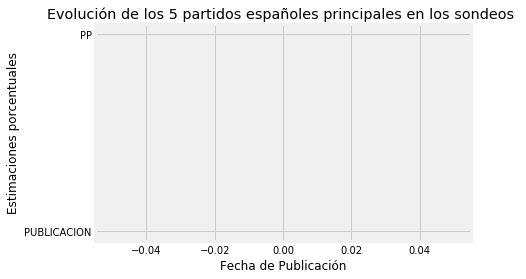

In [58]:
#
plt.title('Evolución de los 5 partidos españoles principales en los sondeos ')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Estimaciones porcentuales')

plt.plot('PUBLICACION')
plt.plot('PP')
plt.show()

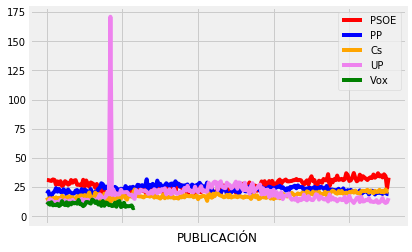

In [60]:
ax = plt.gca()
df.plot(kind='line', x='PUBLICACIÓN', y='PSOE', color='red', ax=ax)
df.plot(kind='line', x='PUBLICACIÓN', y='PP', color='blue', ax=ax)
df.plot(kind='line', x='PUBLICACIÓN', y='Cs', color='orange', ax=ax)
df.plot(kind='line', x='PUBLICACIÓN', y='UP', color='violet', ax=ax)
df.plot(kind='line', x='PUBLICACIÓN', y='Vox', color='green', ax=ax)

plt.show()